In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc

rc('animation', html='jshtml')
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = [10, 8]

In [20]:
def reset():
    global v, vnew, n
    v = np.zeros((n+1, n+1))
    vnew = np.zeros((n+1, n+1))

    # Set the boundary conditions
    for i in range(1,n):
        v[0,i] = 10
        v[n,i] = 10
        v[i,0] = 10
        v[i,n] = 10

L = 10

# The grid is n+1 points along x and y, including boundary points 0 and n
n = 10

# The grid spacing is L/n

# The number of iterations
nsteps = 10

# Initialize the grid to 0
v = np.zeros((n+1, n+1))
vnew = np.zeros((n+1, n+1))
reset()

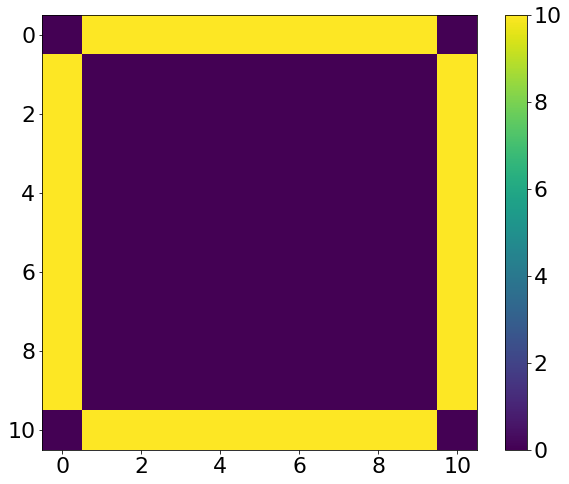

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(v, cmap=None, interpolation='nearest')
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

# checker=1: no checkboard, checker=2: checkerboard (note: n should be even)
checker = 1

In [22]:
# perform one step of relaxation
def relax(n, v, checker):
    for check in range(0,checker):
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    vnew[x,y] = (v[x-1][y] + v[x+1][y] + v[x][y-1] + v[x][y+1])*0.25

        # Copy back the new values to v
        # Note that you can directly store in v instead of vnew with Gauss-Seidel or checkerboard
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    v[x,y] = vnew[x,y]

def relax2(n, v, checker):
    for check in range(0,checker):
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    v[x,y] = (v[x-1][y] + v[x+1][y] + v[x][y-1] + v[x][y+1])*0.25

def relax3(n, v, checker):
    for check in range(0,checker):
        for i in range(2): # 10.11 b)
            for x in range(1,n):
                for y in range(1,n):
                    if (y + x) % 2 == i: # Creates a checkboard update pattern
                        continue

                    if (x*(n+1) + y) % checker == check:
                        v[x,y] = (v[x-1][y] + v[x+1][y] + v[x][y-1] + v[x][y+1])*0.25


def update(step):
    #print(step)
    global n, v, checker

    # FuncAnimation calls update several times with step=0,
    # so we needs to skip the update with step=0 to get
    # the correct number of steps 
    if step > 0:
        relax(n, v, checker)

    im.set_array(v)
    return im,

def update2(step):
    #print(step)
    global n, v, checker

    # FuncAnimation calls update several times with step=0,
    # so we needs to skip the update with step=0 to get
    # the correct number of steps 
    if step > 0:
        relax2(n, v, checker)

    im.set_array(v)
    return im,

def update3(step):
    #print(step)
    global n, v, checker

    # FuncAnimation calls update several times with step=0,
    # so we needs to skip the update with step=0 to get
    # the correct number of steps 
    if step > 0:
        relax3(n, v, checker)

    im.set_array(v)
    return im,

In [5]:
def a(vexact):
    global v, n
    def interate(steps):
        reset()
        for i in range(steps):
            update2(i)

    #vexact = np.full((n+1,n+1), 10*0.9)
    # remove boundaries
    vexact = np.delete(vexact, [0, n], 1)
    vexact = np.delete(vexact, [0, n], 0)
    tol = 0.01

    L = 0
    R = 500
    while L < R:
        m = int((L+R)/2)
        interate(m) ## 55 ish
        v = np.delete(v, [0, n], 1)
        v = np.delete(v, [0, n], 0)
        accuracy = np.max((vexact-v)/vexact)
        #print((vexact[5][5]-v[5][5])/vexact[5][5],v[5][5], accuracy)
        #print(accuracy)

        if accuracy < tol:
            R = m - 1
        elif accuracy > tol:
            L = m + 1
        else:
            return m
        
    print(f"Iterations needed: {m} with gridsize: {n}, accuracy: {accuracy}")

In [6]:
a(np.full((n+1,n+1), 10*0.9))
n = n*2
a(np.full((n+1,n+1), 10*0.9))
n = int(n/2)

Iterations needed: 28 with gridsize: 10, accuracy: 0.012904118930120568
Iterations needed: 110 with gridsize: 20, accuracy: 0.011048598477987979


In [26]:
reset()
anim = animation.FuncAnimation(fig, update2, frames=28+1, interval=200, blit=True, repeat=False)
anim.save('11a1-n20step28.gif', writer='imagemagick', fps=14)

MovieWriter imagemagick unavailable; using Pillow instead.


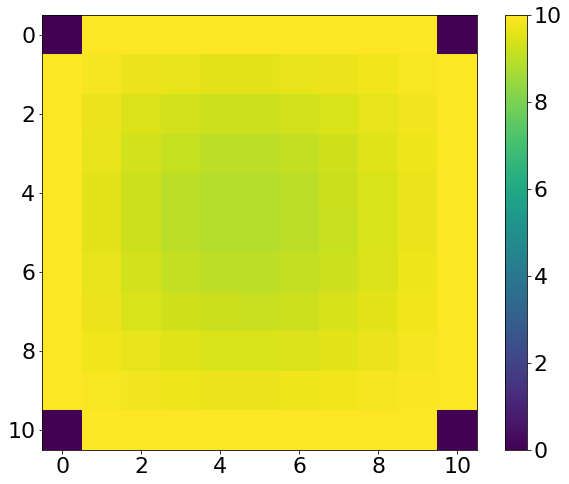

In [12]:
reset()
for i in range(28):
    update2(i)
    
va = v.copy()
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(va, cmap=None, interpolation='nearest')
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

In [13]:
def b(vexact):
    global v, n
    def interate(steps):
        reset()
        for i in range(steps):
            update3(i)

    #vexact = np.full((n+1,n+1), 10*0.9)
    # remove boundaries
    vexact = np.delete(vexact, [0, n], 1)
    vexact = np.delete(vexact, [0, n], 0)
    tol = 0.01

    L = 0
    R = 500
    while L < R:
        m = int((L+R)/2)
        interate(m) ## 55 ish
        v = np.delete(v, [0, n], 1)
        v = np.delete(v, [0, n], 0)
        accuracy = np.max((vexact-v)/vexact)
        #print((vexact[5][5]-v[5][5])/vexact[5][5],v[5][5], accuracy)
        #print(accuracy)

        if accuracy < tol:
            R = m - 1
        elif accuracy > tol:
            L = m + 1
        else:
            return m
        
    print(f"Iterations needed: {m} with gridsize: {n}, accuracy: {accuracy}")

In [14]:
b(np.full((n+1,n+1), 10*0.9))
n = n*2
b(np.full((n+1,n+1), 10*0.9))
n = int(n/2)

Iterations needed: 28 with gridsize: 10, accuracy: 0.006867786897302806
Iterations needed: 110 with gridsize: 20, accuracy: 0.009377194417346068


In [28]:
#n=10
reset()
anim = animation.FuncAnimation(fig, update3, frames=110+1, interval=200, blit=True, repeat=False)
#anim.save('11b1-n20step110.gif', writer='imagemagick', fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.


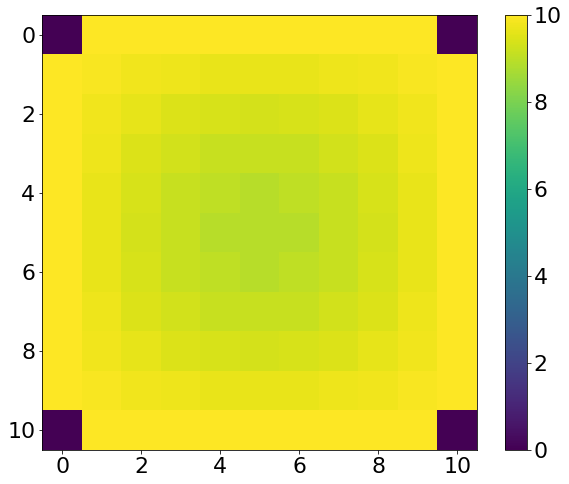

In [16]:
reset()
for i in range(28):
    update3(i)

vb = v.copy()
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(vb, cmap=None, interpolation='nearest')
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

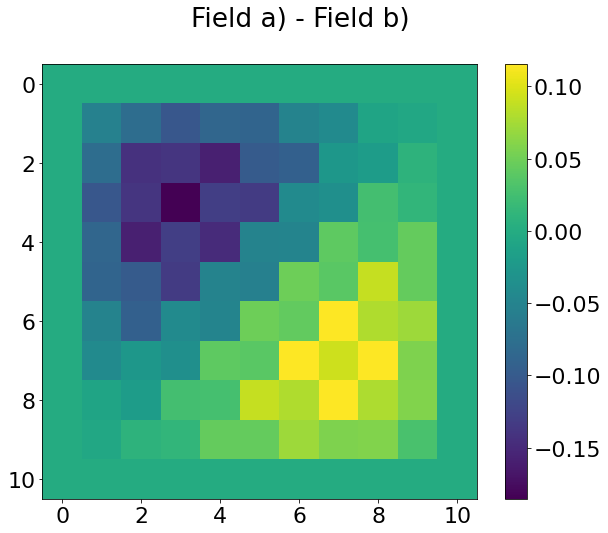

In [17]:
# they converge to almost the same field
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(va - vb, cmap=None, interpolation='nearest')
fig.suptitle("Field a) - Field b)")
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')